In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

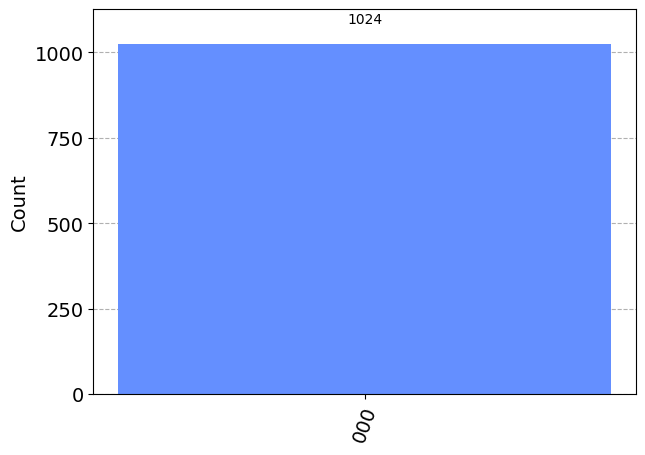

In [13]:
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

# Create a quantum circuit with 3 qubits and 3 classical bits
qr = qk.QuantumRegister(3, name='q')
cr = qk.ClassicalRegister(3, name='c')
qc = qk.QuantumCircuit(qr, cr)

# Prepare the initial state (0 or 1) you want to protect against bit-flip errors
initial_state = 0

if initial_state == 1:
    qc.x(qr[0])  # Set the first qubit to |1>

# Encode the initial state using the repetition code
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])

# Decode the information and perform error detection
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])
qc.ccx(qr[2], qr[1], qr[0])

# Measure the qubits
qc.measure(qr, cr)

# Define the noise model
noise_model = NoiseModel()
p_error = 0.1  # Error probability

# Single-qubit depolarizing error
single_qubit_error = depolarizing_error(p_error, 1)
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['x'])

# Two-qubit depolarizing error
two_qubit_error = depolarizing_error(p_error, 2)
#noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# Three-qubit depolarizing error
three_qubit_error = depolarizing_error(p_error, 3)
#noise_model.add_all_qubit_quantum_error(three_qubit_error, ['ccx'])

# Execute the circuit on a simulator with noise
backend = qk.Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=1024, noise_model=noise_model).result()
counts = result.get_counts(qc)
#Draw
#qc.draw(output='mpl')
# Display the results

plot_histogram(counts)

